# Brownian motion

Simulation using one particle in two dimmensions  

In [3]:
from scipy import stats, constants
from scipy.stats import norm, poisson
#from ipywidgets import interact
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from random import random, normalvariate
%matplotlib inline

## As a random walk process  

Assumptions:
- The number of times a particle can change direction in a certain amount of time can be modelled as a discrete variable
- A change on vesicle direction at any step in time is independent from its state in the previous step
- We have a constant time step of one second

An equation to model Brownian motion follows
$$
X(0) = X_0
$$
$$
X(t+dt) = X(t) + N(0, 1; t, t+dt)
$$
Where $N(0,1,t_1,t_2)$ is a normally distributed random variable with mean 0 and variance 1, and is independet from $N(0,1,t_3,t_4)$ [source](https://en.wikipedia.org/wiki/Brownian_motion)  

We simulate this by sampling from a Normal distribution at each step.

The step function simulates the accumulated stimulus for the particle movement, caused by the continuous bombardment of particles to the vesicle. This stimulus will produce the particle displacement after collisions are computed.

In [2]:
def random_walk_2d_stimulus():
    return (norm.rvs(loc=0, scale=1.0), norm.rvs(loc=0, scale=1.0))

In [3]:
def collisions(curr_x, curr_y, stimulus, borders):
    new_x = curr_x + stimulus[0]
    new_y = curr_y + stimulus[1]
    
    # left wall
    if new_x < -15:
        pass
    # right wall
    if new_x > 15:
        pass
    if new_y < -15:
        pass
    if new_y > 15:
        pass

def couldCollide(EV, stimulus, borders):
    return False
    closeTo = []
    for i in range(len(borders)):
        # check if the curr_x crosses any of the vertices coords
        for x in borders[i,:,0]:
            if EV.pos_x + stimulus[0] < x:
                closeTo.append(i)
        for x in borders[i,:,1]:
            pass

In [4]:
class EV:
    def __init__(self, x = 0., y=0.):
        self.initial_x = x
        self.initial_y = y
        self.pos_x = [x]
        self.pos_y = [y]
        #self.stim_x = []
        #self.stim_y = []
    
    def addStimulus(self, stim):
        x = self.pos_x[len(self.pos_x) - 1]
        y = self.pos_y[len(self.pos_y) - 1]
        
        self.pos_x.append(x + stim[0])
        self.pos_y.append(y + stim[1])
        #self.stim_x.append(stimulus[0])
        #self.stim_y.append(stimulus[1])

In [9]:
simulatedSteps

1

(0.3179157283769977, 0.13362415592892496)
x: 0.0 y: 0.0


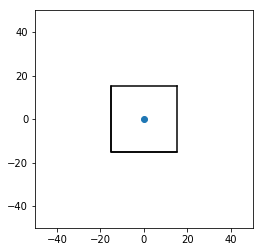

In [7]:
# octagonal borders, needs to be declared as borders, not vertex
#borders = np.array([(10,15),(15,10),(15,-10),(10,-15),(-10,-15),(-15,-10),(-15,10),(-10,15),(10,15)])
# squared borders
borders = np.array([[(15,15),(15,-15)],[(15,-15),(-15,-15)],[(-15,-15),(-15,15)],[(-15,15),(15,15)]])

currentTime = 0
simulatedSteps = 0
EVs = [EV(0., 15.)]

@interact(t=(0,1000,1))
def simulate(t=0):
    global currentTime
    global simulatedSteps
    currentTime = t
    
    if simulatedSteps < t + 1:
        newSteps = (t+1) - simulatedSteps
        for i in range(newSteps):
            for idx in range(len(EVs)):
                # compute the stimulus for the next time step
                xy = random_walk_2d_stimulus()
                print(xy)
                # check any possible collisions in the new position
                if couldCollide(EVs[idx], xy, borders):
                    # compute the collision
                    pass
                else:
                    # store the stimulus
                    EVs[idx].addStimulus(xy)
            simulatedSteps += 1
    else:
        pass
    
    # plot each EV current position
    plt.axes().set_aspect('equal')
    plt.axis([-50, 50,-50, 50])
    plt.plot(borders[:,0], borders[:,1], 'k-')
    
    for idx in range(len(EVs)):
        x = np.sum(EVs[idx].pos_x[:currentTime])
        y = np.sum(EVs[idx].pos_y[:currentTime])
        print('x:',x,'y:',y)
        plt.plot(x, y, 'o')    
    
    plt.show()


# Multiple EVs

Extending our model for 1 < N < 1000 particles

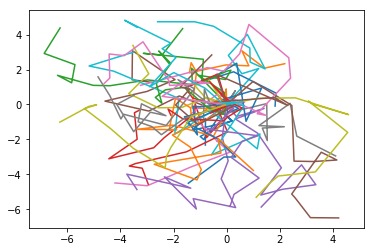

In [10]:
N = 30
particles = []
movement = []
steps = 10

for idx in range(N):
    particles.append({'x':np.append(0.0, norm.rvs(size=steps)), 'y':np.append(0.0, norm.rvs(size=steps)), 'size': np.random.randint(30,171,1)}) 

for idx in range(N):
    plt.plot(np.cumsum(particles[idx]['x']), np.cumsum(particles[idx]['y']))

## As a particles dispersion simulation

To estimate how the particle disperses on a liquid, we need to use the  
### Stoke-Einstein equation  
\begin{equation*}
D(T) = \frac{k T}{6 \pi \eta (T) r}
\end{equation*}
Where $k$ is the Boltzmann constant, $T$ is the temperature in Kelvins, $\eta$ is the viscosity of the solvent, and $r$ is the hydrodinamic radius.

From experimental data, EV size was identified between $50-250 \mathrm{nm}$

For the parameters, the size of the particle is 30$\mathrm{nm}$ - 

In [112]:
diameter_30nm = 300 * 1E-9

fluidViscosity = 0.0010016
Temp = 293.15 # temp in kelvins

kBT = constants.Boltzmann * Temp
sixPiVisc = 6 * np.pi * fluidViscosity

kBT, sixPiVisc

(4.0473711363799994e-21, 0.018879715211013223)

In [113]:
D = kBT / (sixPiVisc * (diameter_30nm/2))
#D = 1
D

1.4291780326640453e-12

In [128]:
x0 = 0
y0 = 0

T = 3600 * 60
N = 10

xs = np.zeros([N,T])
ys = np.zeros([N,T])

for t in range(T):
    for n in range(N):
        xs[n, t] = (xs[n, t-1] if t > 0 else x0) + np.sqrt(D) * normalvariate(0, 1)
        ys[n, t] = (ys[n, t-1] if t > 0 else y0) + np.sqrt(D) * normalvariate(0, 1)

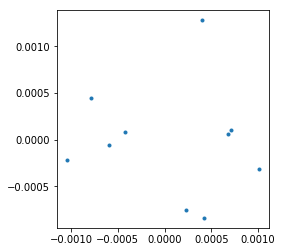

In [130]:
t = T-1
fig = plt.figure()
plt.axes().set_aspect('equal')
#plt.axis([-0.001,0.001,-0.001,0.001])
plt.plot(xs[:,t], ys[:,t], '.')

In [134]:
T*(1/260)

830.7692307692308

In [4]:
# 10 particles, 100 s, 10 steps per s
steps = np.random.random([10,1000])

In [8]:
steps[0,:]

0.2950284837742333

In [219]:
nrm = np.random.normal(0, 0.338133699, 1000)

In [220]:
np.mean(nrm), np.std(nrm)

(-0.019966699653813567, 0.3353807611954261)

In [321]:
#D = [5.35942492, 4.763933262, 4.287539936, 3.897763578, 3.572949947, 3.298107643, 3.062528526, 2.858359957]
# 0.1
D01 = [1.464161865, 1.380425045, 1.309586184, 1.248641434, 1.195483157, 1.148583065, 1.106802336, 1.069272642]
# 0.01
D001 = [0.463008636, 0.436528728, 0.414127514, 0.394855091, 0.378044968, 0.363213857, 0.35000163, 0.338133699]

MDD = D01[7]

n_particles = 200
n_steps = 30000

sd = MDD /1.25
print(sd)
nrm2 = np.random.normal(0, sd, n_particles * n_steps * 2)
rnrm = nrm2.reshape((n_particles, n_steps, 2))
rnrm.shape

0.8554181136000001


(200, 30000, 2)

In [323]:
x0, y0 = 0, 0

dt=0.01
t_ds = []
one_seconds = np.array([n for n in range(10,610,10)])
five_seconds = 5 * one_seconds
ten_seconds = 10 * one_seconds
sixty_seconds = 60 * one_seconds
for i in range(n_particles):
    x, y = 0, 0
    displacements, d_1s, d_5s, d_10s, d_60s= [], [], [], [], []
    
    x_1_1s, y_1_1s = x, y
    x_1_5s, y_1_5s = x, y
    x_1_10s, y_1_10s = x, y
    x_1_60s, y_1_60s = x, y
    for j in range(n_steps):
        x_1, y_1 = x, y
        x += rnrm[i, j, 0]
        y += rnrm[i, j, 1]
        displ = np.sqrt((x - x_1)**2 + (y - y_1)**2)
        displacements.append(displ)
        if j+1 in one_seconds:
            d = np.sqrt((x - x_1_1s)**2 + (y - y_1_1s)**2)
            d_1s.append(d)
            x_1_1s, y_1_1s = x, y
        if j+1 in five_seconds:
            d = np.sqrt((x - x_1_5s)**2 + (y - y_1_5s)**2)
            d_5s.append(d)
            x_1_5s, y_1_5s = x, y
        if j+1 in ten_seconds:
            d = np.sqrt((x - x_1_10s)**2 + (y - y_1_10s)**2)
            d_10s.append(d)
            x_1_10s, y_1_10s = x, y
        if j+1 in sixty_seconds:
            d = np.sqrt((x - x_1_60s)**2 + (y - y_1_60s)**2)
            d_60s.append(d)
            x_1_60s, y_1_60s = x, y
        #if j+1 in [30000, 60000]
    displacements = np.array(displacements)
    tdispl = np.sqrt(x*x + y*y)
    t_ds.append(tdispl)
    #print(f'particle {i}, at {n_steps * dt} seconds, total displacement: {tdispl}, mean:{displacements.mean()}')
print(f'mean total displacements per step: {displacements.mean():.4f}, per second: {np.array(d_1s).mean():.4f}')
print(f'5 secs: {np.array(d_5s).mean():.4f}, 10 secs: {np.array(d_10s).mean():.4f}, 60 secs:{np.array(d_60s).mean():.4f}, total:{np.sum(t_ds)/len(t_ds):.4f}')

mean total displacements per step: 1.0733, per second: 3.3071
5 secs: 6.9294, 10 secs: 9.7519, 60 secs:28.0226, total:180.0872


In [276]:
mean total displacement: 78.6482140859825 per step: 0.4640784552402595 per second: 4.968531915213953 five seconds: 10.940189959474942

[109.07573558845637,
 11.893257755469355,
 63.67490277631125,
 49.922358719750164,
 70.73739065902079,
 34.732229222943054,
 175.73768976037456,
 81.90003236087757,
 125.59801725187043,
 63.77801051814756,
 65.63833293371383,
 44.77013934930192,
 85.20683247309756,
 119.15517412537343,
 159.8761992685009,
 18.52767569019669,
 113.8274620080841,
 57.07770591551543,
 48.530518931671914,
 82.52822532967043,
 110.19097801759393,
 99.37829343831487,
 152.0368003258668,
 115.98701233756437,
 160.2405188478533,
 46.553172961880655,
 27.41079830254682,
 40.436143720022564,
 71.98948631600447,
 83.78639740949916,
 69.98395511774696,
 131.24695540632527,
 91.97883891441339,
 36.39391508294007,
 79.35867375953907,
 53.849096333921636,
 57.79988964314769,
 101.08293991679822,
 90.47340436686042,
 71.32225749458367,
 37.56602885432363,
 47.33683570299386,
 25.894911971254306,
 70.9534677178492,
 162.87953116339654,
 80.48818768597815,
 86.5745642409959,
 58.662695384318255,
 76.26342300115667,
 142